In [1]:
from numpy import *
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
def loadData(filename):
    dataMat=[]
    labelMat=[]
    numFeat=len(open(filename).readline().strip().split(','))-1
    fr=open(filename)
    for line in fr.readlines():
        arr=line.strip().split(',')
        vec=[1]
        for k in range(numFeat):
            vec.append(float(arr[k]))
        dataMat.append(vec)
        labelMat.append(float(arr[-1]))
    return dataMat,labelMat
        

In [3]:
dataset,labels=loadData('ex1data1.txt')
dataMat=mat(dataset)
labelMat=mat(labels).T
theta=zeros((1,2))

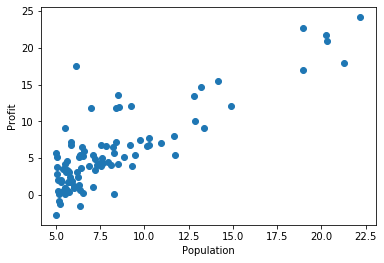

In [4]:
#plt.figure(figsize=(12,8))
plt.scatter(dataMat[:,1:].flatten().A[0],labels)
plt.xlabel('Population'),plt.ylabel('Profit')
plt.show()

In [5]:
def computeCost(X,y,theta):
    inner=power(X*theta.T-y,2)
    return sum(inner)/(2*len(X))

In [6]:
dataMat.shape,theta.shape,labelMat.shape


((97, 2), (1, 2), (97, 1))

In [7]:
computeCost(dataMat,labelMat,theta)

32.072733877455676

In [8]:
def gradientDecent(X,y,theta,alpha,iters):
    temp=zeros((1,theta.shape[1]))
    parameters=theta.shape[1]
    costs=zeros(iters)
    
    for i in range(iters):
        error=X*theta.T-y
        
        for j in range(parameters):
            t=multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-(alpha/len(X))*sum(t)
        
        theta=temp
        costs[i]=computeCost(X,y,theta)
    return theta,costs
            

In [15]:
theta,costs=gradientDecent(dataMat,labelMat,theta,0.01,1500)

[[-3.87805118  1.1912525 ]]


In [10]:
computeCost(dataMat,labelMat,theta)

4.483388256587726

In [11]:
x=linspace(dataMat[:,1].min(),dataMat[:,1].max(),100)
f=theta[0,0]+theta[0,1]*x


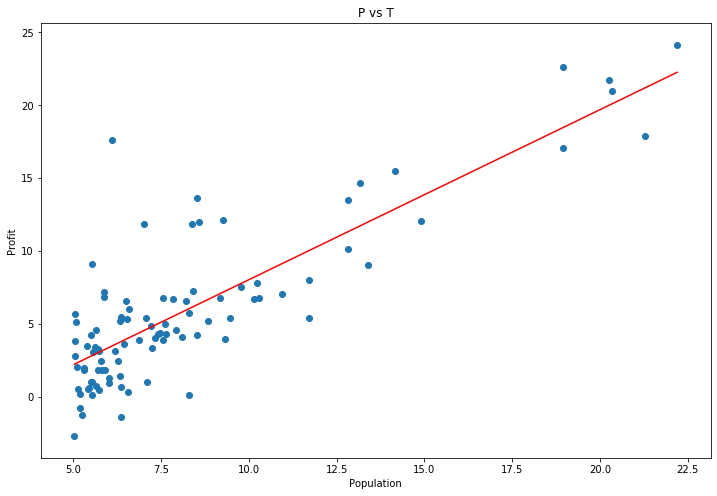

In [12]:
plt.figure(figsize=(12,8))
plt.plot(x,f,'r')
plt.scatter(dataMat[:,1:].flatten().A[0],labels)
plt.xlabel('Population'),plt.ylabel('Profit')
plt.title('P vs T')
plt.show()

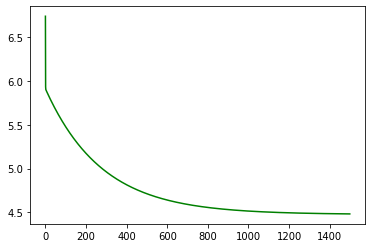

In [13]:
plt.plot(arange(1500),costs,'g')
plt.show()

In [17]:
#normal equatin
def normalEqu(X,y):
    theta=linalg.inv(X.T@X)@X.T*y
    return theta
theta1=normalEqu(dataMat,labelMat)
print(theta1.flatten())
computeCost(dataMat,labelMat,theta)

[[-3.89578088  1.19303364]]


4.47699999352146